In [1]:
# Coin Flip, Head is 1, Tail is -1, to show how the sum is distributed

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
num_of_flips = 1000
num_of_rounds = 1000

In [8]:
rounds = []  # save the result of each round

In [16]:
def sum_of_round(num_of_flips):
    result = 2*sum(np.random.rand(num_of_flips)>0.5)-num_of_flips
    return result

In [35]:
for round in range(num_of_rounds):
    round_sum = sum_of_round(num_of_flip)
    rounds.append(round_sum)
#print(rounds)
print(f"The number of flip is {num_of_flips}, the number of rounds is {num_of_rounds}")
print(f"The mean is {np.mean(rounds)}, the standard deviation is {np.std(rounds)}")

The number of flip is 1000, the number of rounds is 1000
The mean is -0.20806451612903226, the standard deviation is 31.49051981453126


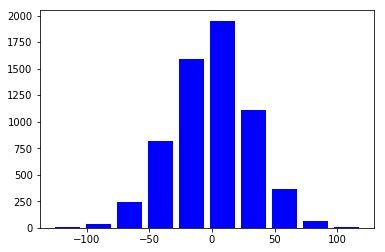

In [37]:
plt.hist(rounds, color ='Blue', rwidth=0.8)
plt.show()

In [38]:
rounds = rounds / num_of_rounds
plt.hist(rounds, color ='Blue', rwidth=0.8)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'